# SNLP Assignment 2

Name 1: Rricha Jalota <br/>
Student id 1: 7010592 <br/>
Email 1: rrja00001 <br/>


Name 2: Pavle Markovic <br/>
Student id 2: 7007913 <br/>
Email 2: pama00002 <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercises 2 and 3. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---


## Exercise 1 (1.5 + 1.5 = 3 points)

The perplexity of a model can also be defined as $2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}$. For the following exercise, use the log probabilities given this pretrained bigram language model. Tokenization is apparent from the tokens in the following table.

|A|B|log p(B\|A)|
|-|-|-|
|`The`|`man`|-1.8|
|`the`|`man`|-2.2|
|`the`|`post`|-2.7|
|`Man`|`the`|-5.1|
|`man`|`the`|-3.7|
|`man`|`shouted`|-2.9|
|`shouted`|`"`|-3.1|
|`post`|`!`|-3.1|
|`"`|`Man`|-1.9|
|`"`|`man`|-1.7|
|`!`|`"`|-1.2|
|`"`|`The`|-0.9|
|`"`|`the`|-1.2|

Assume probabilities not listed are $0^+$ (and the respective logarithm $-\infty$). For counting bigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ in your final counts. Therefore the weight of each bigram is $\frac{1}{|\text{words}|}$.

### 1.1 Lowercasing Input (1.5 points)

Compute the perplexity of the following two sentences (and show the steps).

```
The man shouted "Man the post!"
the man shouted "man the post!"
```

Is lowercasing the input always a good idea? What are the advantages and disadvantages?

### 1.2 Unknown Tokens (1.5 points)

Compute the perplexity of the following two sentences.

```
The man shouted "Man the stations!"
The man shouted "Man the the!"
```

Elaborate on the computed results. 2. Do you consider both sentences to be equally probable?

#### 1.1 
1) count bigrams for the sentences.  
The man shouted "Man the post!" - (The, man)(man, shouted)(shouted, ")(", Man)(Man, the)(the, post)(post, !)(!, ")(", The)  
the man shouted "man the post!" - (the, man)(man, shouted)(shouted, ")(", man)(man, the)(the, post)(post, !)(!, ")(", the)

2) put the corresponding conditional probabilities of the bigrams in the formula of perplexity   
The man shouted "Man the post!" -> $2^{-\frac{1}{9} (-1.8 + -2.9 + -3.1 + -1.9 + -5.1 + -2.7 + -3.1 + -1.2 + -0.9)}$  
 = $2^{-\frac{1}{9} (-22.7)}$ =  $2^{\frac{22.7}{9}}$  = **5.73582099**  
the man shouted "man the post!" -> $2^{-\frac{1}{9} (-2.2 + -2.9 + -3.1 + -1.7 + -3.7 + -2.7 + -3.1 + -1.2 + -1.2)}$    
 = $2^{-\frac{1}{9} (-21.8)}$ =  $2^{\frac{21.8}{9}}$ = **5.35171022**
 
Lowercasing is helpful in situations where words that are cased differently carry the same meaning. E.g. in information retrieval. However, in use-cases where capitalization could carry additional meaning, lowercasing would not be a good idea. Examples include hate-speech detection, fake news detection, etc. In this case, the lowercased example yields better perplexity, however, it doesn't have to be the case in general. For instance, white can be last name and it would be better to leave it uppercased. It can be expected (depending of text of course) that white preveils as colour in train text rather then as last name, therefore, it can cause high perplexity for test texts where white is last name.

**Advantages of lower-casing**
1. smaller vocabulary size, which means perplxity would be lower for the language model.
2. lower computational costs, both in terms of time and resources 
3. Same words will be treated equally, regardless of position in a text (e.g. capitalize at the beginning and lowercased in the middle of a text)

**Disadvantages of lower-casing**
1. loss of important predictive features like word-classes (Proper nouns, in particular), beginning of a sentence.  
2. Language-specific syntactical information - Different languages treat words differently so that should be taken into account (e.g. nouns are uppercased in German)

#### 1.2
1) count bigrams for the sentences.   
The man shouted "Man the stations!" - (The, man)(man, shouted)(shouted, ")(", Man)(Man, the)(the, stations)(stations, !)(!, ")(", The)  
The man shouted "Man the the!" - (The, man)(man, shouted)(shouted, ")(", Man)(Man, the)(the, the)(the, !)(!, ")(", The)   

2) put the corresponding conditional probabilities of the bigrams in the formula of perplexity  
The man shouted "Man the stations!" -> $2^{-\frac{1}{9} (-1.8 + -2.9 + -3.1 + -1.9 + -5.1 + -\infty + -\infty + -1.2 + -0.9)}$  
 = $2^{-\frac{1}{9} (-\infty)}$ =  **$\infty$**   
The man shouted "Man the the!"  -> $2^{-\frac{1}{9} (-2.2 + -2.9 + -3.1 + -1.7 + -3.7 + -\infty + -\infty + -1.2 + -1.2)}$    
  = $2^{-\frac{1}{9} (-\infty)}$ =  **$\infty$** 
  
Even though perplexity of both the sentences turned out to be $\infty$, second sentence would be less probable than the first one because it is ungrammatical. The first sentence, even though grammatical, contains a word that is non-existent in the vocab.  

## Exercise 2 (N-gram models) (1 + 2 = 3 points)

### 2.1

Consider the formula on Page 28 in Chapter 2. 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1.

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (1 pt)


### 2.2 

Given the corpus `orient_express.txt`, find the unigram, bigram, and trigram probability distributions of the text using the formulae obtained in 2.1. Implement the function `find_ngram_probs` in the file `exercise_2.py`. For counting bigrams and trigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ and trigrams $(w_{N-1}, w_N, w_1)$ and $(w_{N}, w_1, w_2)$ in your final counts.

Using the probabilities you obtain, 
1. Plot the probabilities of the 20 most frequent unigrams 
2. For the most frequent unigram, plot the 20 most frequent bigrams starting with that unigram
3. For the most frequent bigram, plot the 20 most frequent trigrams starting with that bigram

Use the function `plot_most_frequent`. Briefly explain your observations (1-2 lines).

NOTE: You must preprocess the text (remove punctuation, special characters, lowercase, tokenise) before you create your n-gram model. **You are NOT allowed to use nltk or any other tokeniser for this purpose**. Write your own function called `preprocess` in `exercise_2.py`. (2 points)

###  2.1 Answer 
$$P(w) = \frac{count(w)}{N}$$  
$$P(w_2 | w_1) = \frac{P(w_1, w_2)}{P(w_1)} = \frac{count(w_1, w_2)}{\sum^{N}_1 count(w_i, w_{i+1})} * \frac{N}{count(w_1)}$$  
$$P(w_3|w_1,w_2) = \frac{P(w_1, w_2, w_3)}{P(w_1, w_2)} = \frac{count(w_1, w_2, w_3)}{\sum^{N}_1 count(w_i, w_{i+1}, w_{i+1})} * \frac{1}{P(w_2 | w_1)} * \frac{1}{P(w_1)} $$

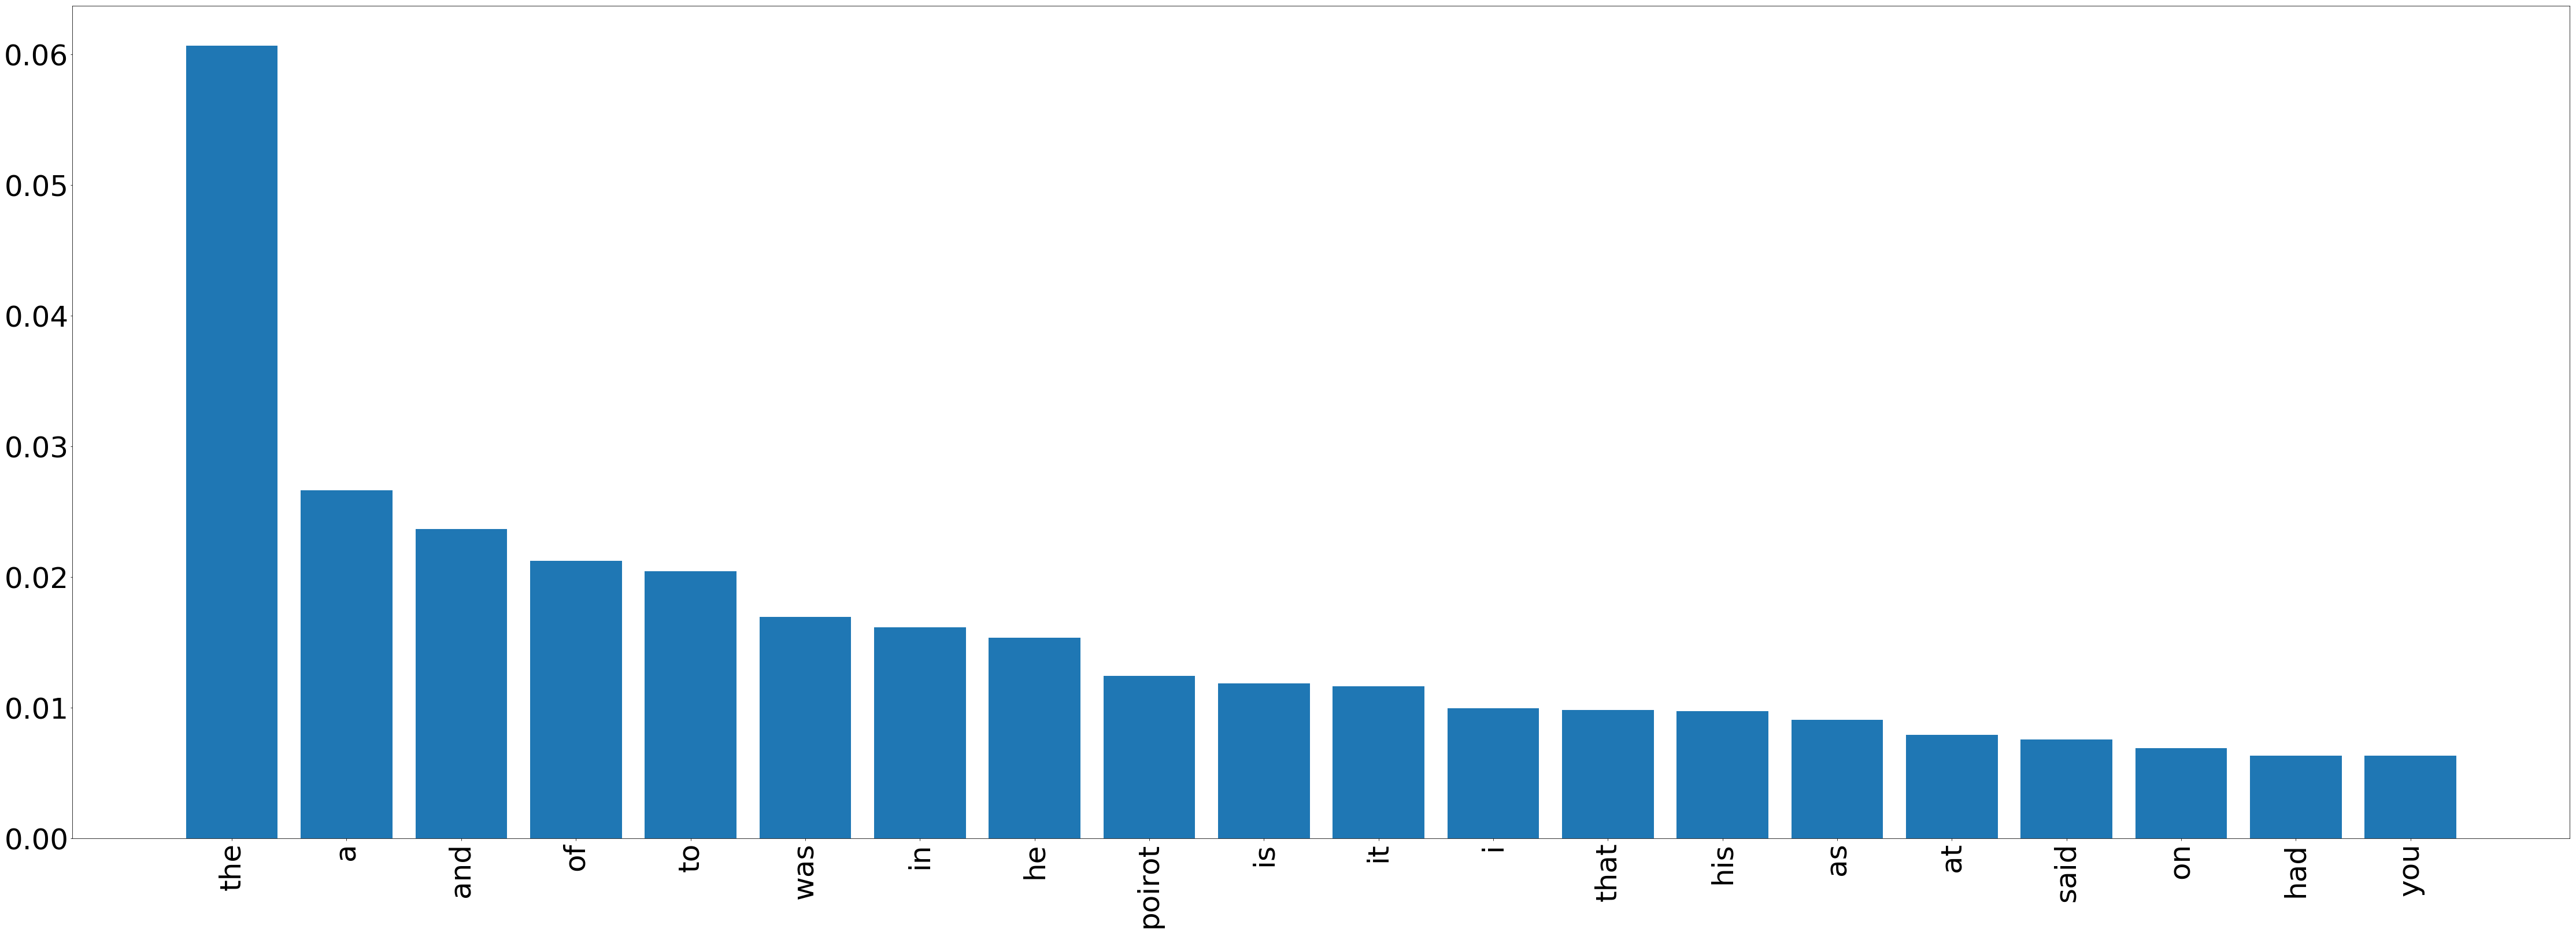

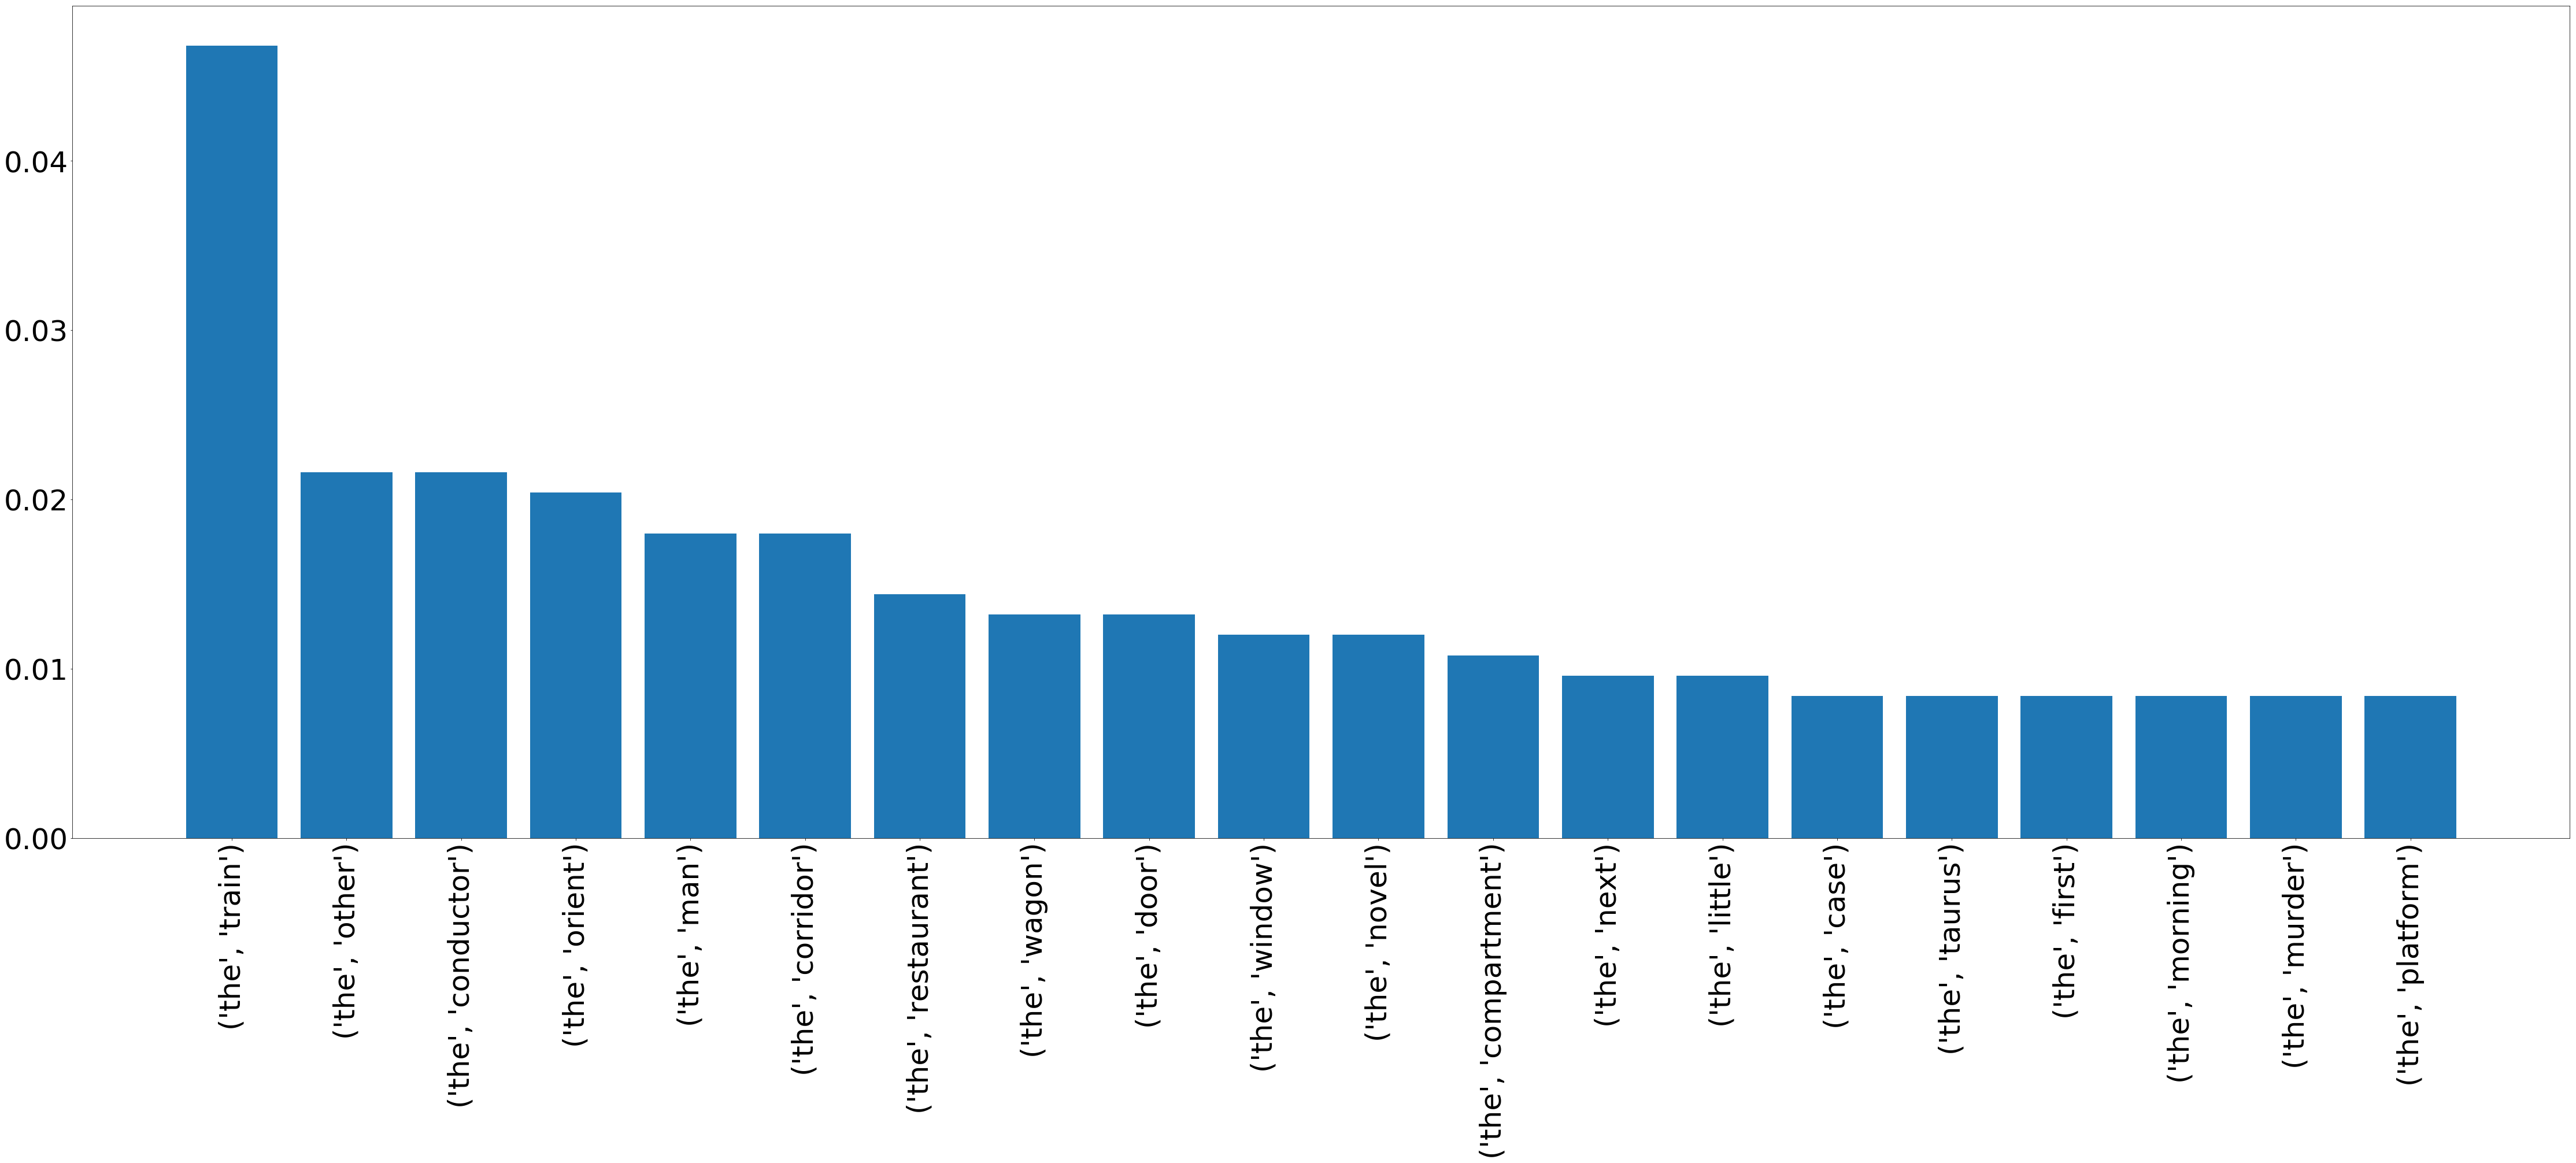

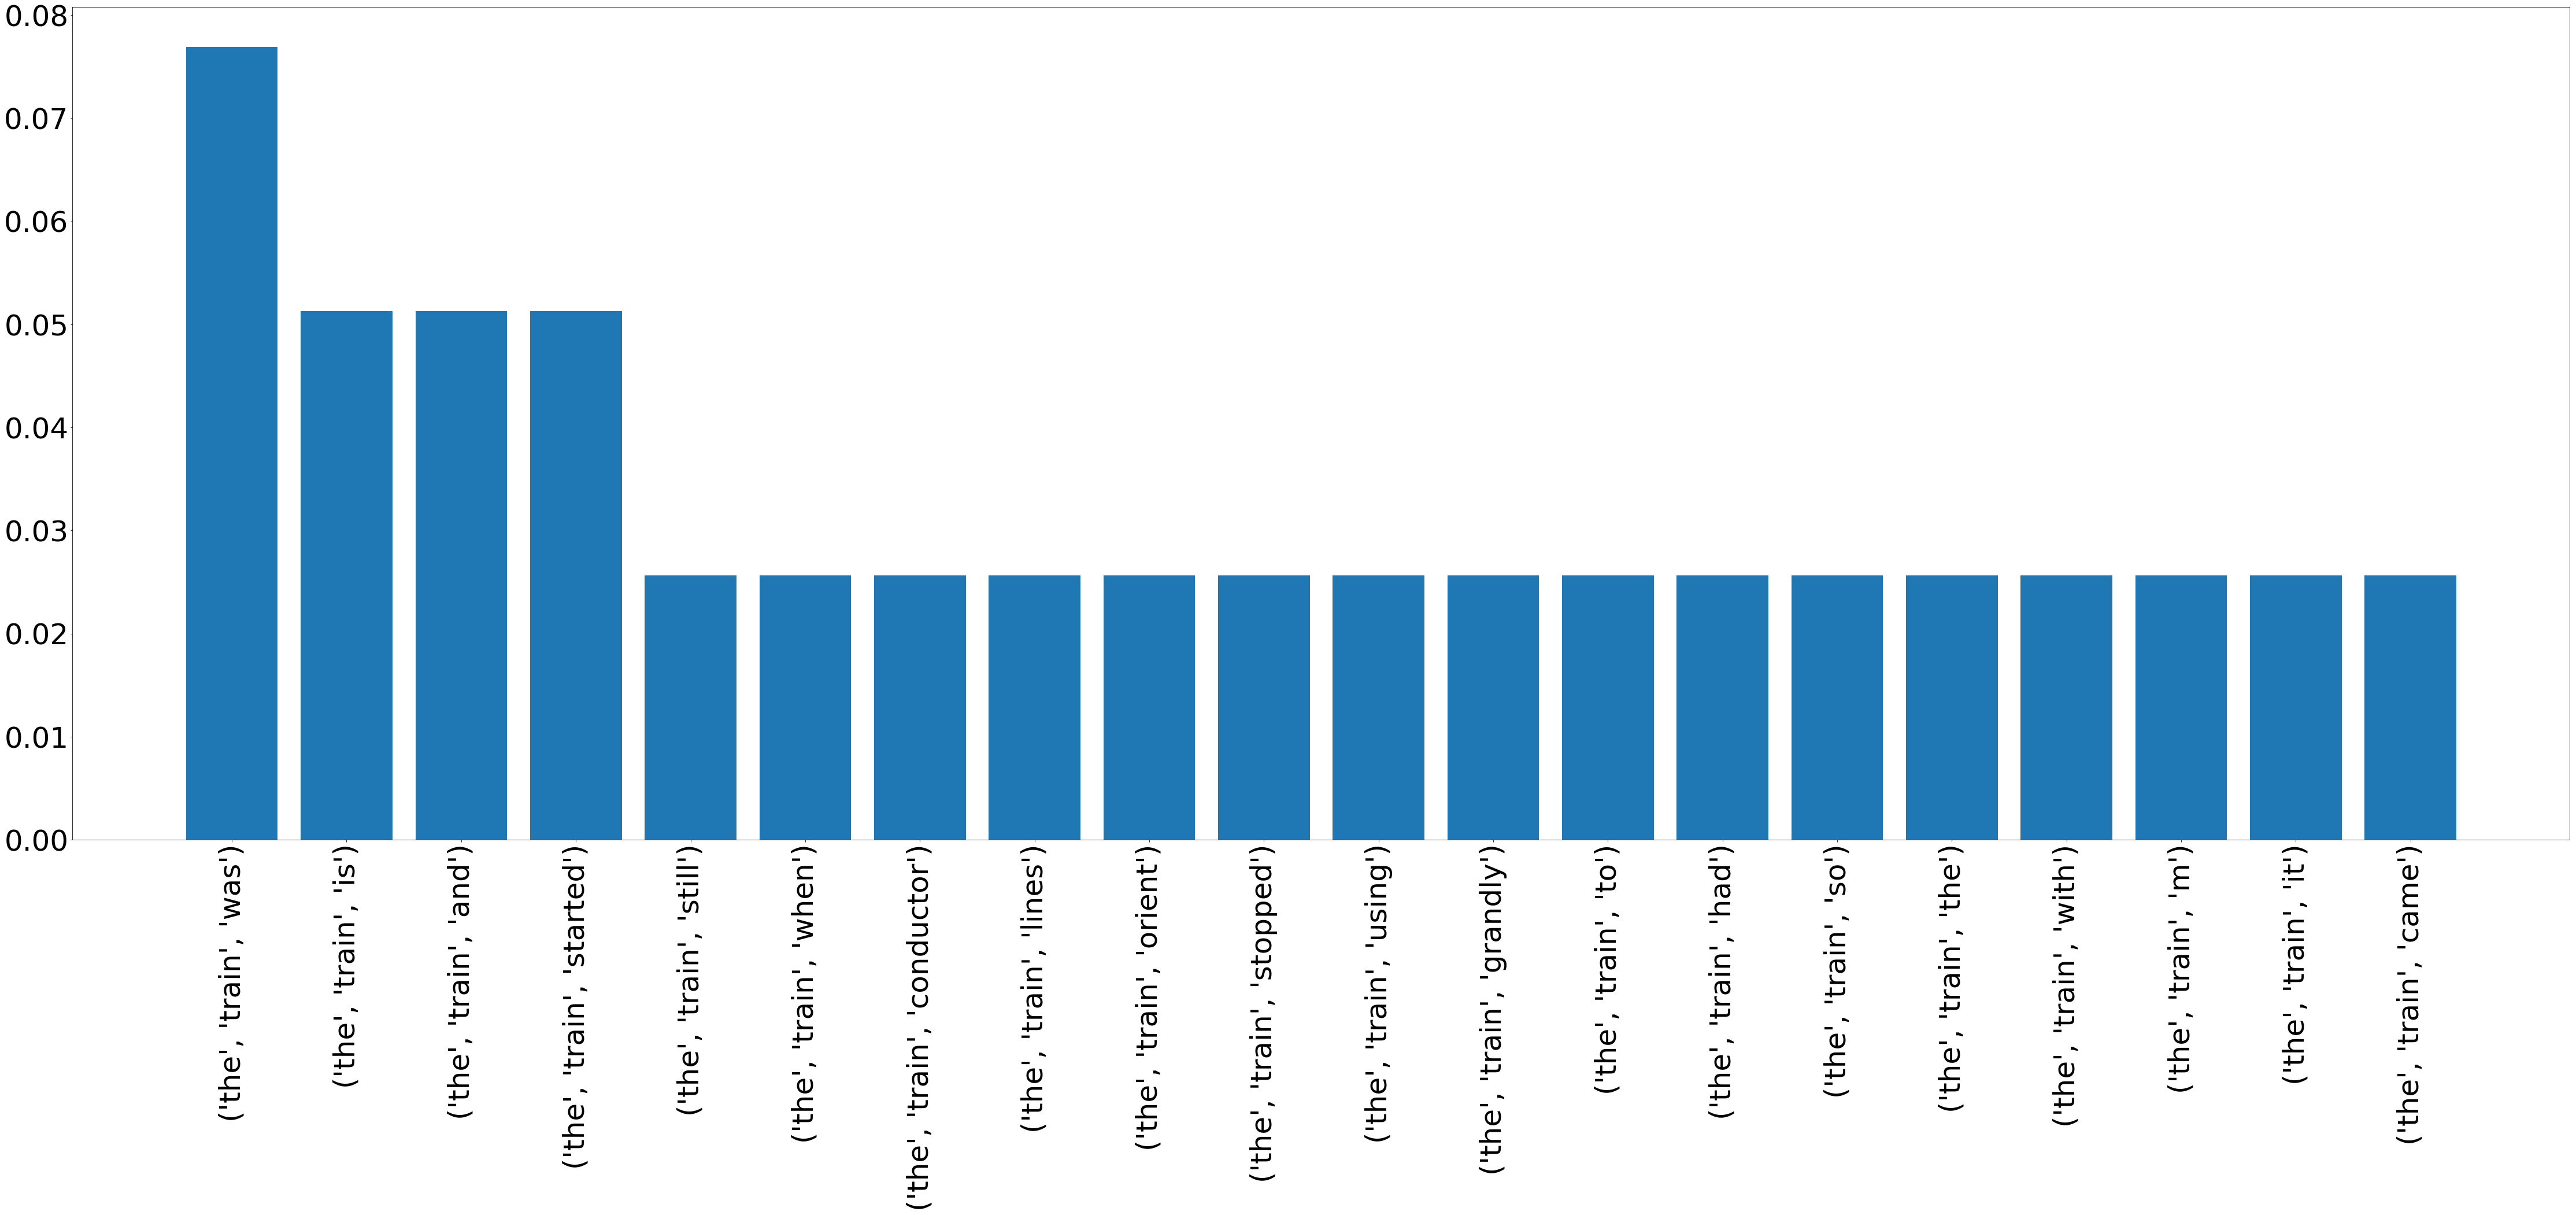

In [80]:
from importlib import reload
import exercise_2
exercise_2 = reload(exercise_2)

file = open("data/orient_express.txt", "r")
text = file.read()

tokens = exercise_2.preprocess(text)

"""
Modify your function call based on how you have defined find_ngram_probs 
in exercise_2.py
"""
unigrams = exercise_2.find_ngram_probs(tokens, model='unigram')
bigrams = exercise_2.find_ngram_probs(tokens, unigrams=unigrams, model='bigram')
trigrams = exercise_2.find_ngram_probs(tokens, unigrams=unigrams, bigrams = bigrams, model='trigram')

"""
Modify the function signature as per your definition of plot_most_frequent 
in exercise_2.py
"""
unigram = exercise_2.plot_most_frequent(unigrams)
bigram = exercise_2.plot_most_frequent(bigrams, most_freq=unigram)
trigram = exercise_2.plot_most_frequent(trigrams, most_freq=bigram)

## Exercise 3 (4 points)

### 3.1 

Read the corpus file again and apply the preprocessing steps from Exercise 2. Split the corpus into a train and test sections; the size of the test section should be 10% of the corpus. Do this by implementing the `train_test_split` function in `exercise_3.py`.  Then, train 3-, 2- and 1-gram language models with your implementation from Exercise 2 on the train section. You may change the parameters of the functions if you find it necessary, but the code should still be written in the .py file. (1 point)

In [10]:
from importlib import reload
import exercise_3, exercise_2
from pathlib import Path

exercise_3 = reload(exercise_3)
exercise_2 = reload(exercise_2)   

file = Path("./data/orient_express.txt").open('r')
text = file.read()

tokenized = exercise_2.preprocess(text)

train, test = exercise_3.train_test_split(tokenized, 0.1)

unigram_lm = exercise_2.find_ngram_probs(train, model='unigram')
bigram_lm = exercise_2.find_ngram_probs(train, unigrams=unigram_lm, model='bigram')
trigram_lm = exercise_2.find_ngram_probs(train, unigrams=unigram_lm, bigrams = bigram_lm, model='trigram')

### 3.2

Calculate relative frequencies for all three test corpora. Do this by implementing the function `relative_frequencies` in `exercise_3.py`. <br/>
Relative frequency is calculated as follows: <br/>
e. g. for bigrams, $ f(w_{i-1}, w_i) = \frac{N(w_{i-1}, w_i)}{N(\bullet,\bullet)}$, where $N( w_{i-1},w_i)$ is the count of the bigram and $N(\bullet,\bullet)$ is the total number of bigrams in the corpus. For consistency, you should include a bigram $(w_N, w_1)$, where $N$ is the length of the corpus (and likewise for trigrams) as you have done in 2.2. (0.5 points)

In [11]:
# TODO: calculate unigram, bigram, trigram relative frequencies
unigram_rfs = exercise_3.relative_frequencies(test)
bigram_rfs = exercise_3.relative_frequencies(test, model='bigram')
trigram_rfs = exercise_3.relative_frequencies(test, model='trigram')

### 3.3

Implement the perplexity calculation for all 3 language models in the function `pp`, and perform the calculation on the test section of the corpus. You should use the perplexity formula from slide 21, chapter 3:
\begin{equation}
  PP = 2^{-\sum_{w,h}f(w,h)\log_2 P(w|h)}
\end{equation}

* Can you simply apply the formula to the language model and the relative frequencies? What would happen if an ngram from the test set is absent in the train set?

* Why is it possible to calculate perplexity with this formula? How does it differ from the formula in exercise 1 of this sheet? 

(1.5 points)

####  Answer  
* No, the formula cannot be applied directly. If an ngram from the test set is absent in the train set, then the perplexity would turn out to be $\infty$. 
* It is possible to calculate perplexity using this formula because only the ngrams that are present both in the test and train set are being considered (using the smoothing operation defined below). The formula in exercise 1, considers a uniform distribution of a word and its history while this formula considers their weighted distribution (by use of relative frequency).


In [13]:
# "Smoothing"
unigram_rfs = {unigram:rf for unigram, rf in unigram_rfs.items() if unigram in unigram_lm}
bigram_rfs = {bigram:rf for bigram, rf in bigram_rfs.items() if bigram in bigram_lm}
trigram_rfs = {trigram:rf for trigram, rf in trigram_rfs.items() if trigram in trigram_lm}

unigram_pp = exercise_3.pp(unigram_lm, unigram_rfs)
bigram_pp = exercise_3.pp(bigram_lm, bigram_rfs)
trigram_pp = exercise_3.pp(trigram_lm, trigram_rfs)

### 3.4 

Plot perplexity scores for all 3 language models. Do so by implementing the `plot_pps` function.
* Explain the differences between the language models. 
* Is it always a good idea to increase the history for n-gram based language models? What can happen if n is too large? (1 point)

#### Answer
* Unigram LM assumes $P(w_i|w1,..w_{i-1})$ = $P(w_i)$ i.e. marginal prob. of $w_i$. Bigram LM assumes $P(w_i|w1,..w_{i-1})$ = $P(w_i|w_{i-1})$ and Trigram LM assumes $P(w_i|w1,..w_{i-1})$ = $P(w_i|w_{i-2},w_{i-1})$.

* No, it is not a good idea to always increase the history for n-gram based language models because the difference in perplexity values becomes increasingly smaller beyond n=3 and eventually, stagnates. For a large n-value, we would also need significantly larger compuational memory.  

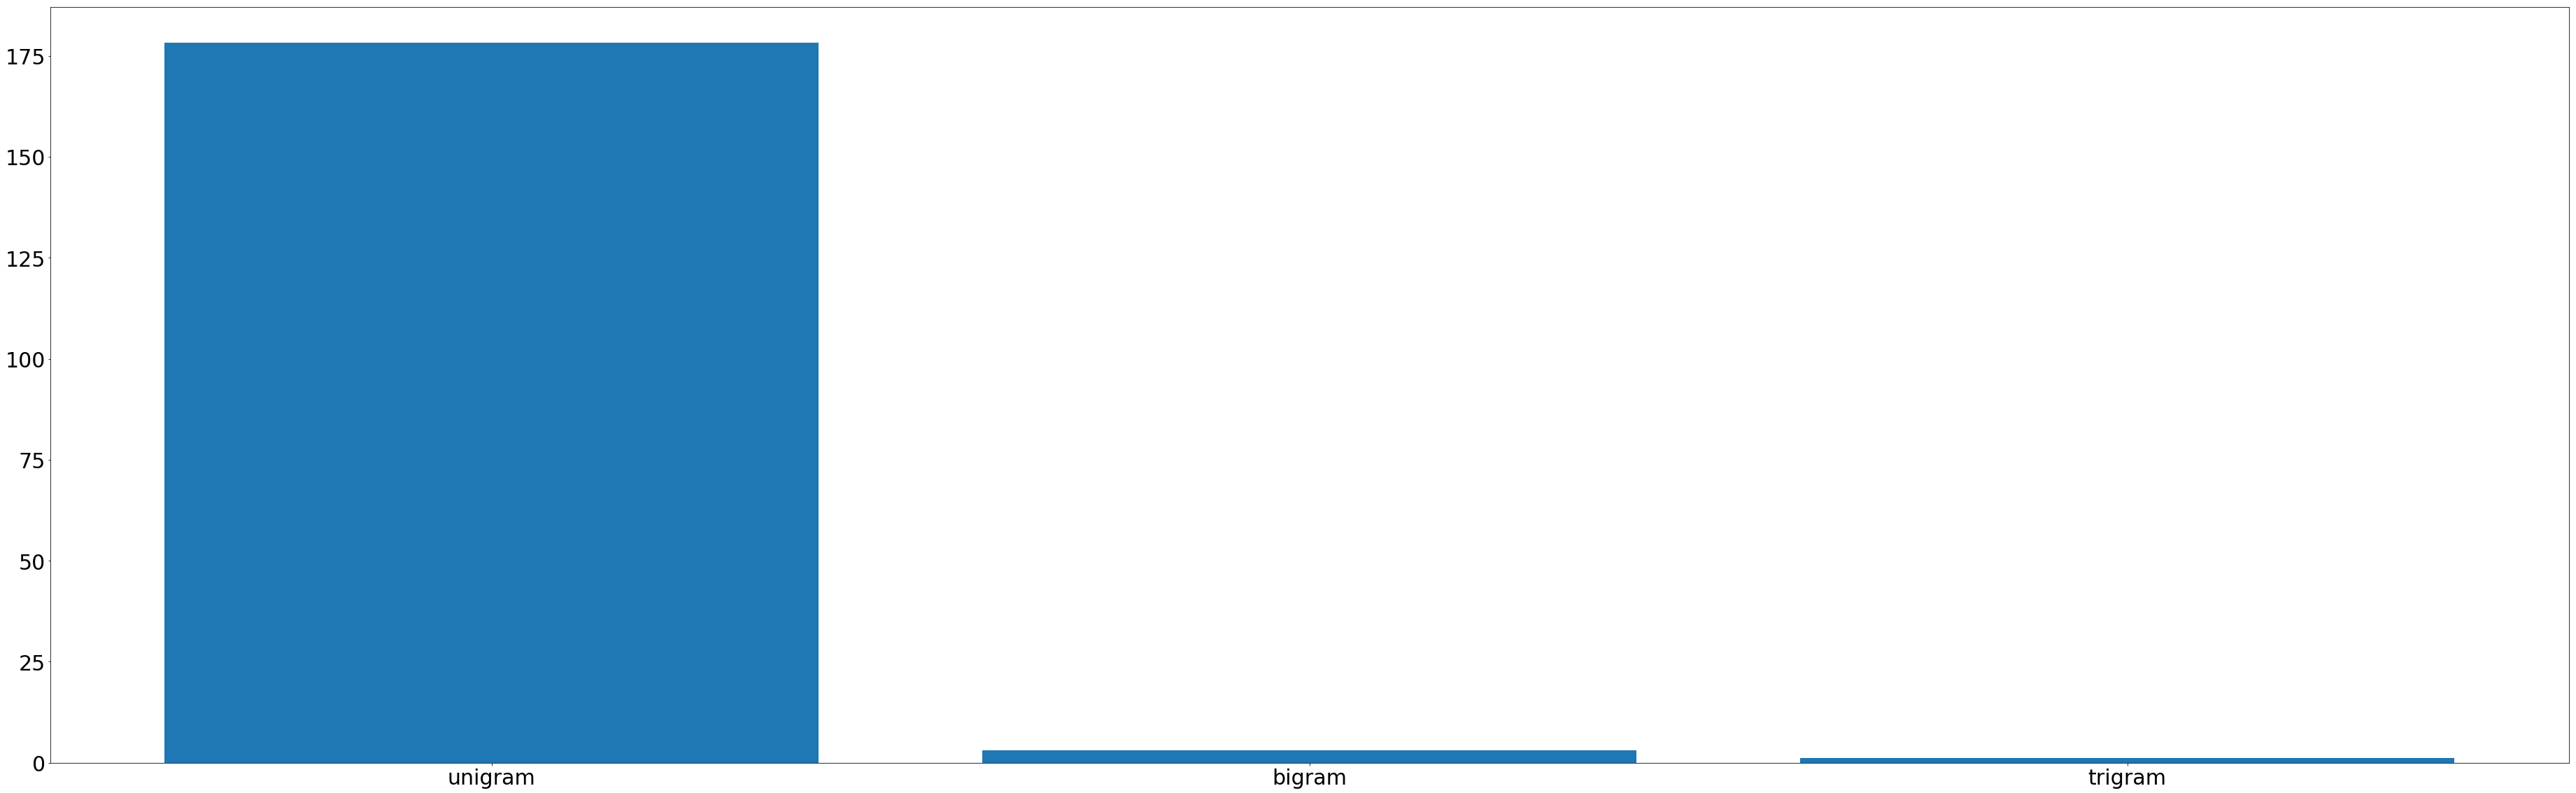

In [9]:
pps = [unigram_pp, bigram_pp, trigram_pp]
exercise_3.plot_pps(pps)

## Bonus (1.5 points)

Revisit exercise 1.

1. Come up with another metric (not language model) as an alternative to perplexity that could measure language model capabilities.
2. What are the advantages and disadvantages of such a metric in comparison to perplexity?
3. Compute your metric with respect to the four sentences (in exercise 1) and the provided language model.

#### Answer   
1. Cross Entropy = ${-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}$ = $\log_2(Perplexity)$
2. **Advantage:**  
Cross Entropy uses logarithms, which is computationally easier to calculate.  
**Disadvantage:**   
Due to exponentiation, improvements in perplexity turn out to be more substantial than the equivalent improvement in entropy. Moreover, the evaluation metric is brought back to linear scale which is easier for humans to understand.  

3. The man shouted "Man the post!" -> ${-\frac{1}{9} (-22.7)} = {\frac{22.7}{9}}$  = **2.52**  
the man shouted "man the post!" -> ${-\frac{1}{9} (-21.8)} = {\frac{21.8}{9}}$ = **2.42**  
The man shouted "Man the stations!" -> ${-\frac{1}{9} (-\infty)}$ =  **$\infty$**   
The man shouted "Man the the!"  -> ${-\frac{1}{9} (-\infty)}$ =  **$\infty$** 